In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")

#Stats
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing

from sklearn.externals.six import StringIO
import plotly.graph_objs as go

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#visualization
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz



# for the neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from keras.layers import Dense, Dropout
    

Data info:
https://www.kaggle.com/kevinarvai/clinvar-conflicting/kernels?sortBy=hotness&group=everyone&pageSize=20&datasetId=20312

Related paper: ClinVar :improving access to variant interpretations
and supporting evidence/ : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5753237/pdf/gkx1153.pdf


The Dataset was obtained by ClinVar, a public resource used to collect information about genetic variants. ClinVar classifies each of these variants into one of three categories:

1. Likely Benign or Benign
2. VUS (A variation in a genetic sequence for which the association with disease risk is unclear)
3. Likely Pathogenic or Pathogenic

The variants were categorized via manual testing by multiple labs. Conflicting categorizations have been assigned to the CLASS column, a 1 represents a conflicting categorizations by different labs while a 0 represents a consistent categorization.

In [221]:
df = pd.read_csv('clinvar_conflicting.csv', low_memory=False)
# or we can do df = pd.read_csv('clinvar_conflicting.csv', dtype={'CHROM': str, 38: str, 40: object})

In [222]:
df.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,955563,G,C,0.0000,0.00000,0.0000,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,11.390,1.133255,-2.0
1,1,955597,G,T,0.0000,0.42418,0.2826,MedGen:CN169374,NaN,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,8.150,0.599088,NaN
2,1,955619,G,C,0.0000,0.03475,0.0088,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,3.288,0.069819,1.0
3,1,957640,C,T,0.0318,0.02016,0.0328,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,12.560,1.356499,NaN
4,1,976059,C,T,0.0000,0.00022,0.0010,MedGen:CN169374,NaN,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,17.740,2.234711,NaN


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
CHROM                 65188 non-null object
POS                   65188 non-null int64
REF                   65188 non-null object
ALT                   65188 non-null object
AF_ESP                65188 non-null float64
AF_EXAC               65188 non-null float64
AF_TGP                65188 non-null float64
CLNDISDB              65188 non-null object
CLNDISDBINCL          76 non-null object
CLNDN                 65188 non-null object
CLNDNINCL             76 non-null object
CLNHGVS               65188 non-null object
CLNSIGINCL            76 non-null object
CLNVC                 65188 non-null object
CLNVI                 27659 non-null object
GENEINFO              59065 non-null object
MC                    58219 non-null object
ORIGIN                59065 non-null float64
SSR                   104 non-null float64
CLASS                 65188 non-null int64
Allele             

In [224]:
df.isnull().sum()

CHROM                     0
POS                       0
REF                       0
ALT                       0
AF_ESP                    0
AF_EXAC                   0
AF_TGP                    0
CLNDISDB                  0
CLNDISDBINCL          65112
CLNDN                     0
CLNDNINCL             65112
CLNHGVS                   0
CLNSIGINCL            65112
CLNVC                     0
CLNVI                 37529
GENEINFO               6123
MC                     6969
ORIGIN                 6123
SSR                   65084
CLASS                     0
Allele                    0
Consequence               0
IMPACT                    0
Feature_type             14
Feature                  14
BIOTYPE                  16
EXON                   8893
INTRON                56385
cDNA_position          8884
CDS_position           9955
Protein_position       9955
Amino_acids           10004
Codons                10004
DISTANCE              65080
STRAND                   14
BAM_EDIT            

In [225]:
# drop columns with more than 50% of null values

df.replace({'':np.nan})
df = df.dropna(thresh=0.5*len(df), axis=1)
df.columns

Index(['CHROM', 'POS', 'REF', 'ALT', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'CLNDISDB',
       'CLNDN', 'CLNHGVS', 'CLNVC', 'GENEINFO', 'MC', 'ORIGIN', 'CLASS',
       'Allele', 'Consequence', 'IMPACT', 'Feature_type', 'Feature', 'BIOTYPE',
       'EXON', 'cDNA_position', 'CDS_position', 'Protein_position',
       'Amino_acids', 'Codons', 'STRAND', 'LoFtool', 'CADD_PHRED', 'CADD_RAW'],
      dtype='object')

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 31 columns):
CHROM               65188 non-null object
POS                 65188 non-null int64
REF                 65188 non-null object
ALT                 65188 non-null object
AF_ESP              65188 non-null float64
AF_EXAC             65188 non-null float64
AF_TGP              65188 non-null float64
CLNDISDB            65188 non-null object
CLNDN               65188 non-null object
CLNHGVS             65188 non-null object
CLNVC               65188 non-null object
GENEINFO            59065 non-null object
MC                  58219 non-null object
ORIGIN              59065 non-null float64
CLASS               65188 non-null int64
Allele              65188 non-null object
Consequence         65188 non-null object
IMPACT              65188 non-null object
Feature_type        65174 non-null object
Feature             65174 non-null object
BIOTYPE             65172 non-null object
EXON   

In [227]:
#drop strings & unnecessary columns for classification
df_drop = df.drop(['POS','REF','ALT', 'CLNDISDB', 'CLNDN','CLNHGVS','EXON','Amino_acids','Codons','BIOTYPE','CLNVC','Feature_type','GENEINFO','MC'], axis = 1)

In [228]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 17 columns):
CHROM               65188 non-null object
AF_ESP              65188 non-null float64
AF_EXAC             65188 non-null float64
AF_TGP              65188 non-null float64
ORIGIN              59065 non-null float64
CLASS               65188 non-null int64
Allele              65188 non-null object
Consequence         65188 non-null object
IMPACT              65188 non-null object
Feature             65174 non-null object
cDNA_position       56304 non-null object
CDS_position        55233 non-null object
Protein_position    55233 non-null object
STRAND              65174 non-null float64
LoFtool             60975 non-null float64
CADD_PHRED          64096 non-null float64
CADD_RAW            64096 non-null float64
dtypes: float64(8), int64(1), object(8)
memory usage: 8.5+ MB


In [229]:
# change into float
change = LabelEncoder()
df_drop['CHROM'] = change.fit_transform(df_drop['CHROM']).astype('float64')

In [230]:
#df_drop = df_drop.apply(pd.to_numeric, errors='coerce')<-If you do this, you get NaN from object columns for some features..

In [231]:
# all objects changed into float64
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 17 columns):
CHROM               65188 non-null float64
AF_ESP              65188 non-null float64
AF_EXAC             65188 non-null float64
AF_TGP              65188 non-null float64
ORIGIN              59065 non-null float64
CLASS               65188 non-null int64
Allele              65188 non-null object
Consequence         65188 non-null object
IMPACT              65188 non-null object
Feature             65174 non-null object
cDNA_position       56304 non-null object
CDS_position        55233 non-null object
Protein_position    55233 non-null object
STRAND              65174 non-null float64
LoFtool             60975 non-null float64
CADD_PHRED          64096 non-null float64
CADD_RAW            64096 non-null float64
dtypes: float64(9), int64(1), object(7)
memory usage: 8.5+ MB


In [232]:
df_drop_numeric = df_drop.drop(['Allele','Consequence','IMPACT','Feature','cDNA_position','CDS_position','Protein_position'], axis =1)

In [233]:
df_drop_numeric.dropna(axis = 0, inplace = True)

In [234]:
df_drop_numeric.isnull().sum()

CHROM         0
AF_ESP        0
AF_EXAC       0
AF_TGP        0
ORIGIN        0
CLASS         0
STRAND        0
LoFtool       0
CADD_PHRED    0
CADD_RAW      0
dtype: int64

In [235]:
df_drop_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54248 entries, 0 to 65171
Data columns (total 10 columns):
CHROM         54248 non-null float64
AF_ESP        54248 non-null float64
AF_EXAC       54248 non-null float64
AF_TGP        54248 non-null float64
ORIGIN        54248 non-null float64
CLASS         54248 non-null int64
STRAND        54248 non-null float64
LoFtool       54248 non-null float64
CADD_PHRED    54248 non-null float64
CADD_RAW      54248 non-null float64
dtypes: float64(9), int64(1)
memory usage: 4.6 MB


In [236]:
#df_drop.CHROM.value_counts()
#MT ->22, X-> 23

In [237]:
# change CHROM variables into integers (numeric variables).
#df['CHROM'] = df['CHROM'].astype('str').apply(lambda x: x.strip())
#df['CHROM'] = df['CHROM'].astype('category')

In [238]:
df[['AF_ESP','AF_EXAC','AF_TGP']].describe()

,AF_ESP,AF_EXAC,AF_TGP
count,65188.000000,65188.000000,65188.000000
mean,0.014511,0.014492,0.015263
std,0.057795,0.059542,0.059527
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000040,0.000000
75%,0.001200,0.001230,0.001600
max,0.499000,0.499890,0.499800


In [239]:
print(len(df['CLNDN'].unique()))
df['CLNDN'].value_counts()[0:10]

9260


not_specified                                                                      5344
Hereditary_cancer-predisposing_syndrome|not_specified                              1724
not_specified|not_provided                                                         1398
Hereditary_cancer-predisposing_syndrome                                            1139
Limb-girdle_muscular_dystrophy,_type_2J|Dilated_cardiomyopathy_1G|not_specified     913
Familial_hypercholesterolemia                                                       732
Ataxia-telangiectasia_syndrome|Hereditary_cancer-predisposing_syndrome              608
Hereditary_cancer-predisposing_syndrome|Familial_cancer_of_breast                   561
Ciliary_dyskinesia|not_specified                                                    526
Hereditary_cancer-predisposing_syndrome|Neurofibromatosis,_type_1                   513
Name: CLNDN, dtype: int64

In [240]:
#num_var_list = ['POS', 'LoFtool', 'CADD_PHRED', 'CADD_RAW']
#scl = StandardScaler()
#df[num_var_list] = scl.fit_transform(df[num_var_list])

In [241]:
#X = df_drop.iloc[:,0:4]

In [242]:
# CLASS column contains 0 or 1 value for classification

In [243]:
df.CLASS.value_counts()

0    48754
1    16434
Name: CLASS, dtype: int64

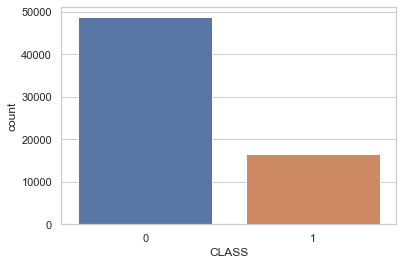

In [244]:
sns.countplot(df['CLASS'], label= "count" )

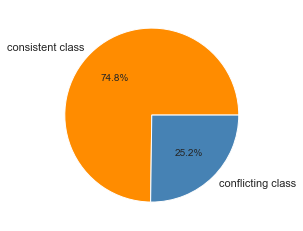

In [245]:
labels = 'consistent class' , 'conflicting class'
values = df['CLASS'].value_counts()
colors = ['darkorange','steelblue']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%.1f%%',colors =colors)
plt.show()

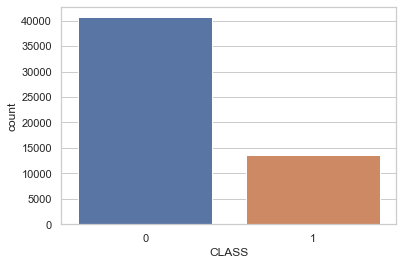

In [246]:
sns.countplot(df_drop_numeric['CLASS'], label= "count" )

In [247]:
df_drop_numeric.describe()

,CHROM,AF_ESP,AF_EXAC,AF_TGP,ORIGIN,CLASS,STRAND,LoFtool,CADD_PHRED,CADD_RAW
count,54248.000000,54248.000000,54248.000000,54248.000000,54248.000000,54248.000000,54248.000000,54248.000000,54248.000000,54248.000000
mean,9.955279,0.012670,0.012525,0.013343,1.259291,0.250184,0.008738,0.350759,15.298382,2.467923
std,6.525864,0.054259,0.055796,0.056074,5.457178,0.433123,0.999971,0.363129,10.750884,2.971267
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000069,0.001000,-5.477391
25%,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,0.024300,6.925000,0.436549
50%,10.000000,0.000000,0.000040,0.000000,1.000000,0.000000,1.000000,0.161000,13.550000,1.543655
75%,15.000000,0.000900,0.000900,0.001200,1.000000,1.000000,1.000000,0.732000,23.700000,4.082717
max,23.000000,0.499000,0.499890,0.496800,513.000000,1.000000,1.000000,1.000000,99.000000,46.556261


In [248]:
df_drop_result = pd.DataFrame()
df_drop_result['CLASS'] = df_drop_numeric.CLASS

In [249]:
df_drop_result = df_drop_result.astype('float64')

In [250]:
df_drop_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54248 entries, 0 to 65171
Data columns (total 1 columns):
CLASS    54248 non-null float64
dtypes: float64(1)
memory usage: 847.6 KB


In [251]:
df_drop_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54248 entries, 0 to 65171
Data columns (total 10 columns):
CHROM         54248 non-null float64
AF_ESP        54248 non-null float64
AF_EXAC       54248 non-null float64
AF_TGP        54248 non-null float64
ORIGIN        54248 non-null float64
CLASS         54248 non-null int64
STRAND        54248 non-null float64
LoFtool       54248 non-null float64
CADD_PHRED    54248 non-null float64
CADD_RAW      54248 non-null float64
dtypes: float64(9), int64(1)
memory usage: 7.1 MB


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



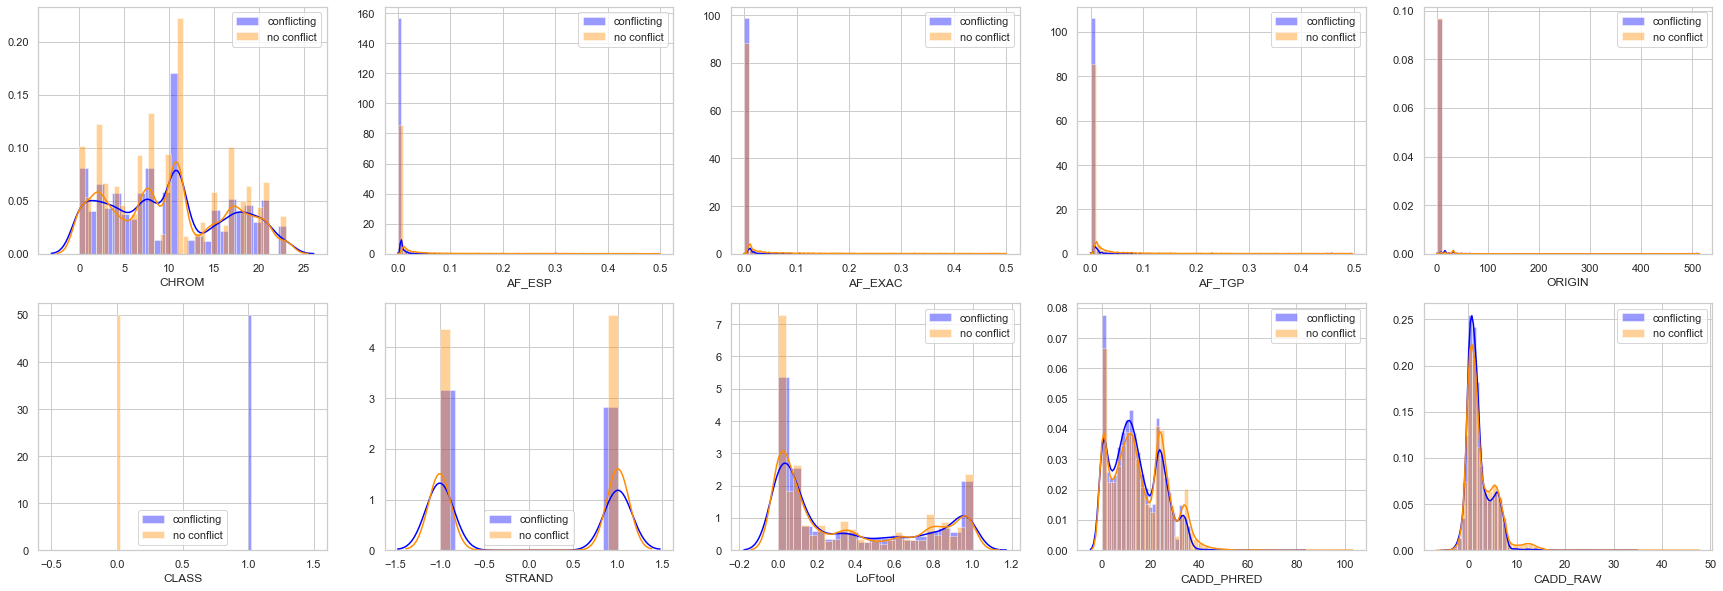

In [252]:
#plot after balancing the dataset


fig = plt.figure(figsize = (30,10))
j = 0 
for i in df_drop_numeric.columns:
    plt.subplot(2, 5, j+1)
    j += 1
    sns.distplot(df_drop_numeric[i][df_drop_result['CLASS'] == 1], color = 'blue', label = 'conflicting')
    sns.distplot(df_drop_numeric[i][df_drop_result['CLASS'] == 0], color = 'darkorange', label = 'no conflict')
    plt.legend(loc = 'best')
plt.show()

In [253]:
X = df_drop_numeric.drop('CLASS', axis=1)
y = df_drop_result['CLASS']


# normalize using standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#splitting the dataset into the training set and test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)




In [254]:
logreg = LogisticRegression(C=100 ,solver='lbfgs')  

logreg.fit(X_train, y_train)
class_pred_class_log = logreg.predict(X_test)

In [255]:
cm = metrics.confusion_matrix(y_test, class_pred_class_log)
print("confusion matrix:\n",cm)

confusion matrix:
 [[4034    1]
 [1390    0]]


# Balanced data

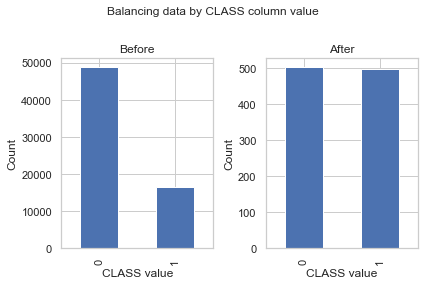

In [256]:
# Balance
g = df_drop_numeric.groupby('CLASS')
df_balanced = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
# Extract smaller sample to avoid memory error later, when training starts
df_balanced = df_balanced.sample(1000)

# Illustrate balancing results on plots
f, ax = plt.subplots(1,2)
# Before balancing plot
df.CLASS.value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title("Before")
ax[0].set_xlabel("CLASS value")
ax[0].set_ylabel("Count")
# After balanced plot
df_balanced.CLASS.value_counts().plot(kind='bar',ax=ax[1])
ax[1].set_title("After")
ax[1].set_xlabel("CLASS value")
ax[1].set_ylabel("Count")

plt.suptitle("Balancing data by CLASS column value")
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



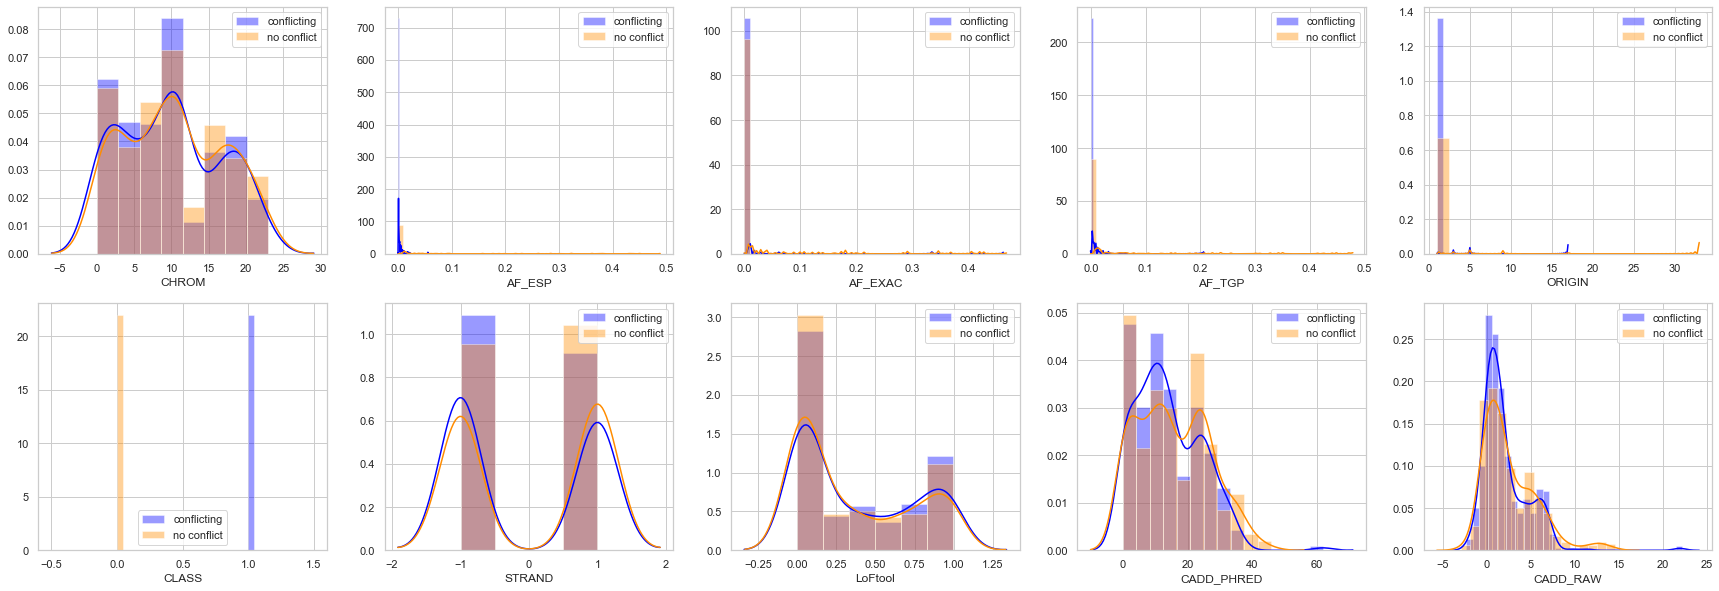

In [257]:



fig = plt.figure(figsize = (30,10))
j = 0 
for i in df_drop_numeric.columns:
    plt.subplot(2, 5, j+1)
    j += 1
    sns.distplot(df_balanced[i][df_balanced['CLASS'] == 1], color = 'blue', label = 'conflicting')
    sns.distplot(df_balanced[i][df_balanced['CLASS'] == 0], color = 'darkorange', label = 'no conflict')
    plt.legend(loc = 'best')
plt.show()

https://www.kaggle.com/vasilyb/clinvar-identifying-conflicting-genetic-variants

In [258]:
X = df_balanced.drop('CLASS', axis=1)
# one hot encoding?
y = df_balanced['CLASS']


# normalize using standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#splitting the dataset into the training set and test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)



# logistic regression

In [259]:
logreg = LogisticRegression(C=100 ,solver='lbfgs')  

logreg.fit(X_train, y_train)
class_pred_class_log = logreg.predict(X_test)


In [260]:
class_pred_class_log

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0])

In [261]:
cm = metrics.confusion_matrix(y_test, class_pred_class_log)
print("confusion matrix:\n",cm)

confusion matrix:
 [[22 29]
 [20 29]]


In [262]:
print("Logistic Regression Classification Report:\n", metrics.classification_report(y_test, class_pred_class_log))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.43      0.47        51
           1       0.50      0.59      0.54        49

    accuracy                           0.51       100
   macro avg       0.51      0.51      0.51       100
weighted avg       0.51      0.51      0.51       100



In [263]:
#If the values of a certain independent variable (feature) are skewed, 
#depending on the model, skewness may violate model assumptions (e.g. logistic regression)
#or may impair the interpretation of feature importance.

In [264]:
 #Shapiro-Wilks test to see if data is skewed
    
data_test = X_train
from scipy.stats import shapiro
shapiro(data_test)[1]

    
    

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



0.0

In [265]:
#num_feats = X_train.dtypes[df.dtypes!='object'].index
#skew_feats = X_train[num_feats].skew().sort_values(ascending=False)
#skewness = pd.DataFrame({'Skew':skew_feats})

In [266]:
# SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

cm1 = metrics.confusion_matrix(y_test, y_pred)
print("SVM confusion matrix:\n",cm1)

SVM confusion matrix:
 [[18 33]
 [14 35]]


In [267]:
# RandomForest
rf = RandomForestClassifier(n_estimators=500, bootstrap=True, oob_score=True, random_state=123)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [268]:
cm2 = metrics.confusion_matrix(y_test, y_pred_rf)
print("confusion matrix:\n",cm2)

confusion matrix:
 [[33 18]
 [19 30]]


In [269]:
# Some models like decision trees are fairly robust to skewed features.

In [270]:
# data input without scaling

X = df_balanced.drop('CLASS', axis=1)
y = df_balanced['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)


In [271]:
decision_tree = DecisionTreeClassifier(max_depth=2)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

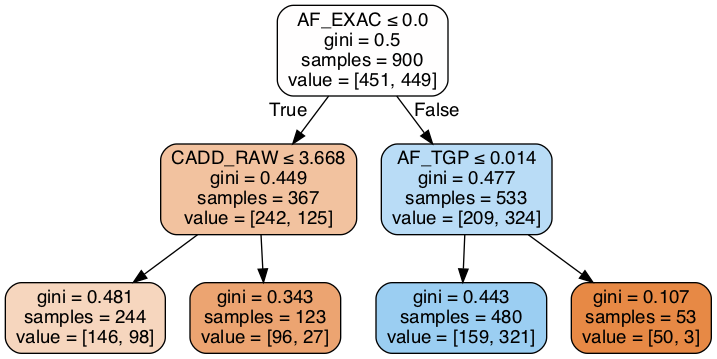

In [272]:
#make a decision tree 
dot_data = StringIO()  
export_graphviz(decision_tree, out_file=dot_data,  
                    feature_names=X_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Decision Tree Train/Test RMSE: 0.6091888960832356   0.6633249580710799
Decision Tree Train/Test RMSE: 0.5647024782032473   0.6403124237432849
Decision Tree Train/Test RMSE: 0.5547772325697746   0.6403124237432849
Decision Tree Train/Test RMSE: 0.5374838498865699   0.6244997998398398
Decision Tree Train/Test RMSE: 0.5322906474223771   0.648074069840786
Decision Tree Train/Test RMSE: 0.5066228051190221   0.6403124237432849
Decision Tree Train/Test RMSE: 0.4737556801183965   0.6557438524302001
Decision Tree Train/Test RMSE: 0.42946995755750417   0.648074069840786
Decision Tree Train/Test RMSE: 0.39440531887330776   0.6403124237432849
Decision Tree Train/Test RMSE: 0.3651483716701107   0.6


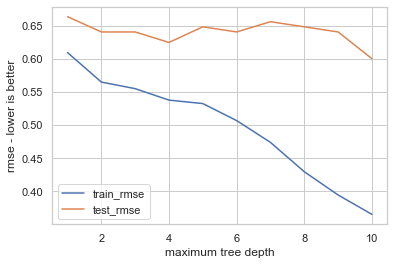

In [273]:
# measure testing errors 
depths = range(1,11)
train_rmse, test_rmse = [],[]
for depth in depths:
    decision_tree = DecisionTreeClassifier(max_depth=depth,random_state=10)
    decision_tree.fit(X_train,y_train)
    curr_train_rmse = np.sqrt(mean_squared_error(y_train,decision_tree.predict(X_train)))
    curr_test_rmse = np.sqrt(mean_squared_error(y_test,decision_tree.predict(X_test)))
    print("Decision Tree Train/Test RMSE:",curr_train_rmse," ",curr_test_rmse)
    train_rmse.append(curr_train_rmse)
    test_rmse.append(curr_test_rmse)
sns.mpl.pyplot.plot(depths,train_rmse,label='train_rmse')
sns.mpl.pyplot.plot(depths,test_rmse,label='test_rmse')
sns.mpl.pyplot.xlabel("maximum tree depth")
sns.mpl.pyplot.ylabel("rmse - lower is better")
sns.mpl.pyplot.legend()


In [274]:
best_decision_tree = DecisionTreeClassifier(max_depth=2)
best_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

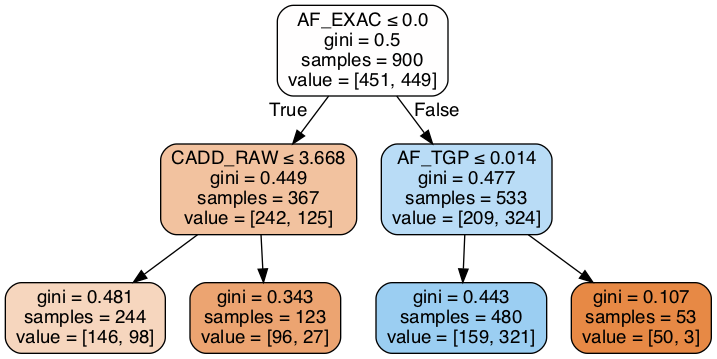

In [275]:
dot_data2 = StringIO()  
export_graphviz(best_decision_tree, out_file=dot_data2,  
                    feature_names=X_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph_best = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph_best.create_png()) 

In [276]:
# use fitted model to make predictions on testing data
y_pred = best_decision_tree.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [277]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)

#ValueError: Classification metrics can't handle a mix of binary and continuous targets

confusion matrix:
 [[31 20]
 [21 28]]


In [278]:
print(" Classification Report:\n", metrics.classification_report(y_test, y_pred))

 Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.61      0.60        51
           1       0.58      0.57      0.58        49

    accuracy                           0.59       100
   macro avg       0.59      0.59      0.59       100
weighted avg       0.59      0.59      0.59       100



In [279]:
# buidling neural network
X = df_balanced.drop('CLASS', axis=1)
y = df_balanced['CLASS']


# normalize using standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#splitting the dataset into the training set and test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)



In [280]:
classifier = Sequential()

In [281]:
classifier.add(Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform"))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=16, kernel_initializer="uniform"))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [282]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

ValueError: Error when checking input: expected dense_10_input to have shape (30,) but got array with shape (9,)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:

cm2 = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm2)

In [ ]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

# Additional EDA

In [ ]:
# In order to find where the most variants are located, use "CHROM" column

In [283]:
df.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDN,CLNHGVS,...,EXON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,STRAND,LoFtool,CADD_PHRED,CADD_RAW
0,1,955563,G,C,0.0000,0.00000,0.0000,"MedGen:C3808739,OMIM:615120|MedGen:CN169374","Myasthenic_syndrome,_congenital,_8|not_specified",NC_000001.10:g.955563G>C,...,1/39,61,11,4,R/P,cGg/cCg,1.0,0.421,11.390,1.133255
1,1,955597,G,T,0.0000,0.42418,0.2826,MedGen:CN169374,not_specified,NC_000001.10:g.955597G>T,...,1/39,95,45,15,P,ccG/ccT,1.0,0.421,8.150,0.599088
2,1,955619,G,C,0.0000,0.03475,0.0088,"MedGen:C3808739,OMIM:615120|MedGen:CN169374","Myasthenic_syndrome,_congenital,_8|not_specified",NC_000001.10:g.955619G>C,...,1/39,117,67,23,V/L,Gtc/Ctc,1.0,0.421,3.288,0.069819
3,1,957640,C,T,0.0318,0.02016,0.0328,"MedGen:C3808739,OMIM:615120|MedGen:CN169374","Myasthenic_syndrome,_congenital,_8|not_specified",NC_000001.10:g.957640C>T,...,2/39,311,261,87,D,gaC/gaT,1.0,0.421,12.560,1.356499
4,1,976059,C,T,0.0000,0.00022,0.0010,MedGen:CN169374,not_specified,NC_000001.10:g.976059C>T,...,4/39,576,526,176,L,Ctg/Ttg,1.0,0.421,17.740,2.234711


In [284]:
df.corr()

,POS,AF_ESP,AF_EXAC,AF_TGP,ORIGIN,CLASS,STRAND,LoFtool,CADD_PHRED,CADD_RAW
POS,1.000000,0.007003,0.007721,0.004225,0.010502,0.012061,-0.122896,0.257226,-0.005409,-0.009753
AF_ESP,0.007003,1.000000,0.851870,0.807741,-0.010724,-0.126538,-0.011551,0.027343,-0.164169,-0.148118
AF_EXAC,0.007721,0.851870,1.000000,0.805634,-0.010286,-0.121213,-0.013358,0.027831,-0.154891,-0.140803
AF_TGP,0.004225,0.807741,0.805634,1.000000,-0.011208,-0.130077,-0.014002,0.029447,-0.167057,-0.150989
ORIGIN,0.010502,-0.010724,-0.010286,-0.011208,1.000000,0.002920,-0.009731,-0.023043,0.051741,0.057404
CLASS,0.012061,-0.126538,-0.121213,-0.130077,0.002920,1.000000,-0.031369,0.000045,-0.037713,-0.053485
STRAND,-0.122896,-0.011551,-0.013358,-0.014002,-0.009731,-0.031369,1.000000,-0.160170,0.014463,0.009622
LoFtool,0.257226,0.027343,0.027831,0.029447,-0.023043,0.000045,-0.160170,1.000000,-0.038808,-0.039227
CADD_PHRED,-0.005409,-0.164169,-0.154891,-0.167057,0.051741,-0.037713,0.014463,-0.038808,1.000000,0.955003
CADD_RAW,-0.009753,-0.148118,-0.140803,-0.150989,0.057404,-0.053485,0.009622,-0.039227,0.955003,1.000000


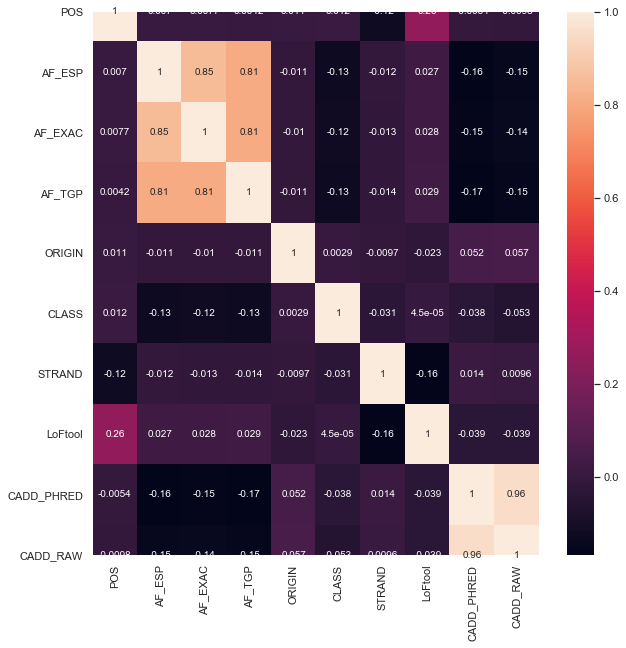

In [285]:
fig, ax = plt.subplots (figsize = (10,10))
sns.heatmap(df.corr(), annot = True, ax= ax)
plt.show()

In [286]:
# compare allele frequencies from different sources.
#CADD is a tool for scoring the deleteriousness of single nucleotide variants as well as insertion/deletions variants in the human genome.


In [287]:
#MOTIF_SCORE_CHANGE The difference in motif score of the reference and variant sequences for the TFBP

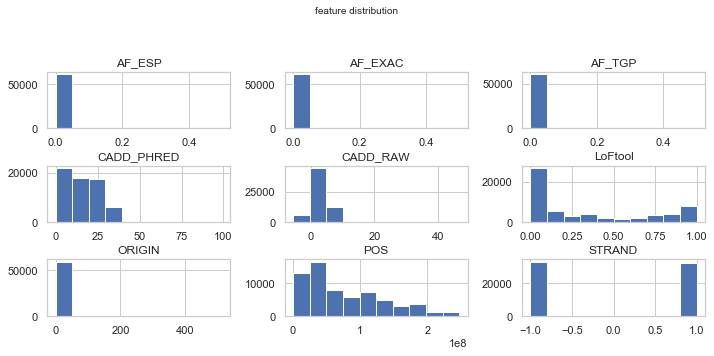

In [288]:
df.drop('CLASS', axis =1).hist(figsize = (10,5))
plt.suptitle("feature distribution", fontsize=10)
plt.tight_layout()
plt.subplots_adjust(top=0.8)

Text(0.5, 1.0, 'Consequence of varients with confliciting class')

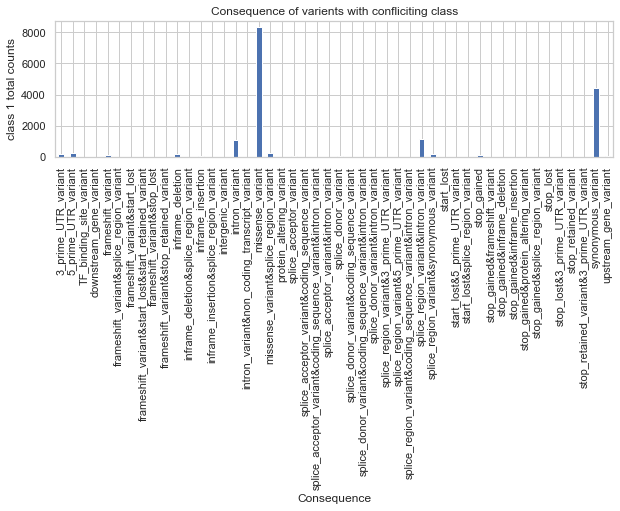

In [289]:
plt.figure(figsize = (10,2.5), frameon = False)
df.groupby('Consequence')['CLASS'].sum().plot(kind = 'bar')
plt.ylabel('class 1 total counts')
plt.title('Consequence of varients with confliciting class')

Text(0.5, 1.0, 'Chromosome location of varients with confliciting class')

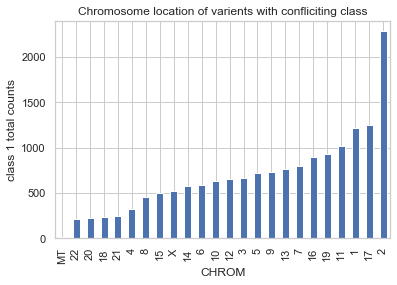

In [290]:
df.groupby('CHROM')['CLASS'].sum().sort_values().plot(kind = 'bar')
plt.ylabel('class 1 total counts')
plt.title('Chromosome location of varients with confliciting class')

# how do I sort values here?

In [293]:
df.groupby(['CHROM','CLASS']).size()

CHROM  CLASS
1      0        3237
       1        1217
10     0        1709
       1         632
11     0        3833
       1        1013
12     0        2095
       1         655
13     0        1883
       1         763
14     0        1401
       1         573
15     0        1222
       1         503
16     0        3026
       1         901
17     0        4146
       1        1248
18     0         657
       1         239
19     0        2977
       1         934
2      0        6364
       1        2281
20     0         538
       1         221
21     0         600
       1         243
22     0         925
       1         210
3      0        1868
       1         661
4      0         887
       1         319
5      0        2919
       1         724
6      0        1576
       1         583
7      0        2069
       1         798
8      0        1399
       1         453
9      0        2012
       1         732
MT     0           5
       1          11
X      0        1406


In [294]:
df_class0 = df[df['CLASS'] == 0]

In [295]:
df_class0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48754 entries, 0 to 65183
Data columns (total 31 columns):
CHROM               48754 non-null object
POS                 48754 non-null int64
REF                 48754 non-null object
ALT                 48754 non-null object
AF_ESP              48754 non-null float64
AF_EXAC             48754 non-null float64
AF_TGP              48754 non-null float64
CLNDISDB            48754 non-null object
CLNDN               48754 non-null object
CLNHGVS             48754 non-null object
CLNVC               48754 non-null object
GENEINFO            44367 non-null object
MC                  43775 non-null object
ORIGIN              44367 non-null float64
CLASS               48754 non-null int64
Allele              48754 non-null object
Consequence         48754 non-null object
IMPACT              48754 non-null object
Feature_type        48749 non-null object
Feature             48749 non-null object
BIOTYPE             48749 non-null object
EXON   

Text(0.5, 1.0, 'mutation types with confliciting class')

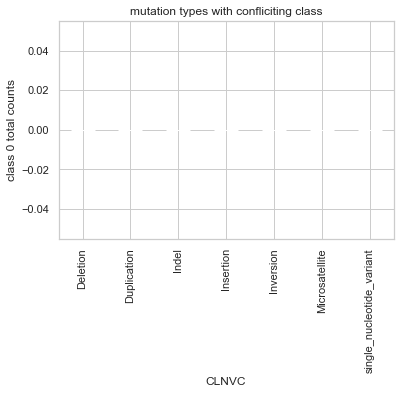

In [296]:
df_class0.groupby('CLNVC')['CLASS'].sum().plot(kind = 'bar')
plt.ylabel('class 0 total counts')
plt.title('mutation types with confliciting class')

Text(0.5, 1.0, 'mutation types with confliciting class')

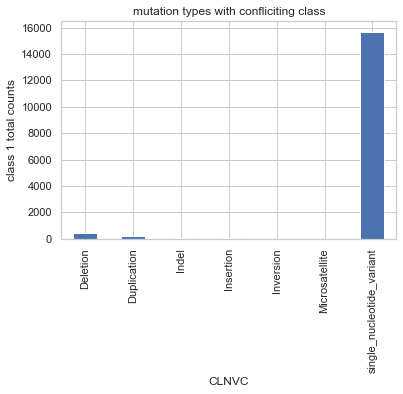

In [297]:
df.groupby('CLNVC')['CLASS'].sum().plot(kind = 'bar')
plt.ylabel('class 1 total counts')
plt.title('mutation types with confliciting class')

Text(0.5, 1.0, 'impact of mutation with confliciting class')

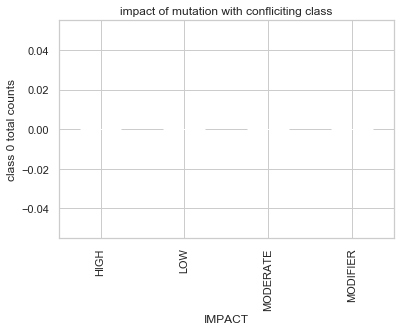

In [298]:
df_class0.groupby('IMPACT')['CLASS'].sum().plot(kind = 'bar')
plt.ylabel('class 0 total counts')
plt.title('impact of mutation with confliciting class')

In [ ]:
df.groupby('IMPACT')['CLASS'].sum().plot(kind = 'bar')
plt.ylabel('class 1 total counts')
plt.title('impact of mutation with confliciting class')